# Text_Classifitacion: Text classification

## Problema: 
Para un contexto de multi-label classification con imbalance classes, poder entrenar modelos de machine learning con texto y su respectiva etiqueta de la emoción de cada texto y obtener por medio de métricas de errores el desempeño de cada modelo. 

## Objetivos generales:

Entrenar modelos de machine learning con texto (text_classifitacion_train.csv) y predecir nuevos input de texto (text_classifitacion_test.csv)

## Objetivos específicos:
1. Construir un modelo que sea capaz de clasificar las distintas emociones. El modelo queda a criterio de la/el Data Scientist.
2. Describir paso a paso qué se está haciendo y por qué.
3. Entregar un análisis de las diferentes métricas utilizadas (accuracy, F1-score, entre otras).
4. En base a la clasificación de los comentarios, construir un indicador o KPI capaz de medir el nivel de satisfacción global, explicar significado y justificar la selección.

### Solución:
Para la clasificación de texto de usaron 3 métodos y 4 modelos de machine learning junto con 3 métricas de errores:


**a)Métodos:** 


**a.1) Bag of words/Using Word Counts as a Feature:** 

Este método cuenta las palabras que hay en cada frase. La teoría detrás de este método, es que hay emociones las cuales necesitan de más texto para expresarse, como por ejemplo la molestia. Antes de usar este método se hizo un pre-procesamiento de los textos. Lo que se usó fue lo siguiente: 


    a.1.1) Punctuation Removal: se eliminan todos los signos de puntuación del texto. La biblioteca de cadenas de Python contiene una lista predefinida de puntuaciones como: '!"#$%&'()*+,-./:;?@[\]^_`{|}~' 


    a.1.2) Lowering the text: Es uno de los pasos de preprocesamiento de texto más comunes de Python en el que el texto se convierte en minúsculas.


    a.1.3) Tokenization: En este paso, el texto se divide en unidades más pequeñas. Podemos usar la tokenización de oraciones o la tokenización de palabras en función de la declaración de nuestro problema.


    a.1.4) Stop word removal: Stopwords son las palabras de uso común y se eliminan del texto ya que no agregan ningún valor al análisis. Estas palabras tienen menos o ningún significado.  La biblioteca NLTK consta de una lista de palabras que se consideran palabras vacías para el idioma inglés. Algunos de ellos son: [yo, yo, mi, yo mismo, nosotros, nuestro, nuestro, nosotros mismos, ustedes, ustedes, ustedes, ustedes, ustedes, ustedes, ustedes, ustedes mismos, él, la mayoría, otros, algunos, tales, no, ni, no, solo, propio, igual, entonces, también, muy, s, t, puede, voluntad, solo, don, don't, should, should've, ahora, d, ll, m, o, re, ve, y, ain, no son, podría, no podría, no, no]


    a.1.5) Stemming: También se conoce como el paso de estandarización del texto en el que las palabras se derivan o se reducen a su forma raíz/base. Por ejemplo, palabras como 'programador', 'programación', 'programa' se derivarán a 'programa'.


    a.1.6) Lemmatization: Deriva la palabra, pero se asegura de que no pierda su significado. La lematización tiene un diccionario predefinido que almacena el contexto de las palabras y verifica la palabra en el diccionario.
    


a.2) **Modelos:** 

Debido a que es un problema de clasificación, se optaron por los siguientes modelos:


a.2.1) Naive Bayes


a.2.2) KNN


a.2.3) SVM


a.2.4) Logistic Regression

a.3) **Métricas de errores:**

Se optaron por 3 métricas de errores:

a.3.1) Accuracy: Se refiere a lo cerca que está el resultado de una medición del valor verdadero dentro de la matriz de confusión en la clasificación de resultados.

a.3.2)F1 score:  métrica muy empleada porque nos resume la precisión y sensibilidad en una sola métrica. Por ello es de gran utilidad cuando la distribución de las clases es desigual. El valor más alto posible de F1 Score es 1, lo que indica una precisión y sensibilidad perfectas, y el valor más bajo posible es 0, si la precisión o la sensibilidad es cero.

a.3.3) Recall: se representa como la fracción de verdaderos positivos.

a.3.4) Precision: Cuantifica el número de predicciones de clase positivas que realmente pertenecen a la clase positiva

a.3.5) Matriz de confusión: Herramienta que permite visualizar el desempeño de un algoritmo de aprendizaje supervisado. Cada columna de la matriz representa a las instancias de la clase real, mientras que cada fila representa las predicciones para cada claseSe realizó solo para el modelo que obtuvo el mejor rendimiento

#### Se cargan las librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
test=pd.read_csv('text_classification_test.csv')
train=pd.read_csv('text_classification_train.csv')
emotions= pd.read_csv('emotions.txt', delimiter = "\t", names= ['Emotion'])
counts_emotions=train['emotion'].str.split(',').explode('emotion').value_counts()
emotion_number=list(range(0,28,1))
emotions['Emotion_number']=emotion_number
emotions.head(28)

,Emotion,Emotion_number
0,admiration,0
1,amusement,1
2,anger,2
3,annoyance,3
4,approval,4
5,caring,5
6,confusion,6
7,curiosity,7
8,desire,8
9,disappointment,9


In [3]:
label_to_text= {emotions['Emotion_number'][i]: emotions['Emotion'][i] for i in range(len(emotions['Emotion_number']))}
print("Resultant dictionary is : " + str(label_to_text) )

Resultant dictionary is : {0: 'admiration', 1: 'amusement', 2: 'anger', 3: 'annoyance', 4: 'approval', 5: 'caring', 6: 'confusion', 7: 'curiosity', 8: 'desire', 9: 'disappointment', 10: 'disapproval', 11: 'disgust', 12: 'embarrassment', 13: 'excitement', 14: 'fear', 15: 'gratitude', 16: 'grief', 17: 'joy', 18: 'love', 19: 'nervousness', 20: 'optimism', 21: 'pride', 22: 'realization', 23: 'relief', 24: 'remorse', 25: 'sadness', 26: 'surprise', 27: 'neutral'}


In [4]:
train['text'].head()

0    My favourite food is anything I didn't have to...
1    Now if he does off himself, everyone will thin...
2                       WHY THE FUCK IS BAYLESS ISOING
3                          To make her feel threatened
4                               Dirty Southern Wankers
Name: text, dtype: object

In [5]:
train['emotion'].head(20)

0       27
1       27
2        2
3       14
4        3
5       26
6       15
7     8,20
8        0
9       27
10       6
11     1,4
12      27
13       5
14       3
15    3,12
16      15
17       2
18      27
19    6,22
Name: emotion, dtype: object

### Pre-procesamiento del texto

In [6]:
#1. Punctuation Removal:
import string
string.punctuation

#Remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

train['text']= train['text'].apply(lambda x:remove_punctuation(x))
test['text']= test['text'].apply(lambda x:remove_punctuation(x))

#2. Lowering the text

train['text']= train['text'].apply(lambda x: x.lower())
test['text']= test['text'].apply(lambda x: x.lower())

#3. Tokenization:
    
#defining function for tokenization
import nltk
def tokenization(text):
    tokens = nltk.word_tokenize(text)
    return tokens
#applying function to the column
train['text']= train['text'].apply(lambda x: tokenization(x))
test['text']= test['text'].apply(lambda x: tokenization(x))


#4. Stop word removal: 
    
nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

#Remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

train['text']= train['text'].apply(lambda x:remove_stopwords(x))
test['text']= test['text'].apply(lambda x:remove_stopwords(x))


#5. Stemming: 
    
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
train['text']=train['text'].apply(lambda x: stemming(x))
test['text']=test['text'].apply(lambda x: stemming(x))

#6. Lemmatization: 
    
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
train['text']=train['text'].apply(lambda x:lemmatizer(x))
test['text']=test['text'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crisf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\crisf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\crisf\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
train['text'].head()

0                 [favourit, food, anyth, didnt, cook]
1    [everyon, think, he, laugh, screw, peopl, inst...
2                                 [fuck, bayless, iso]
3                               [make, feel, threaten]
4                            [dirti, southern, wanker]
Name: text, dtype: object

In [8]:
test['text'].head()

0    [’, realli, sorri, situat, although, love, nam...
1                                         [wonder, aw]
2    [king, fan, good, luck, guy, interest, game, w...
3           [didnt, know, thank, teach, someth, today]
4    [got, bore, haunt, earth, thousand, year, ulti...
Name: text, dtype: object

### Método 1: Using Word Counts as a Feature

In [9]:
#Contamos las palabras que hay en la columna texto
train['word_count'] =train['text'].apply(lambda x: len(x))
test['word_count'] =test['text'].apply(lambda x: len(x))

count_text=count_text=train.assign(emotion=train['emotion'].str.split(',')).explode("emotion")
emotion_words=count_text.groupby('emotion')['word_count'].sum().reset_index()

text_df=emotion_words['emotion']
text_df=pd.DataFrame(text_df)
text_df["text"] = text_df["emotion"].str.strip().astype(int).map(label_to_text)

#### A traves de este gráfico categórico, podemos ver las emociones y cuántas palabras hay por emoción

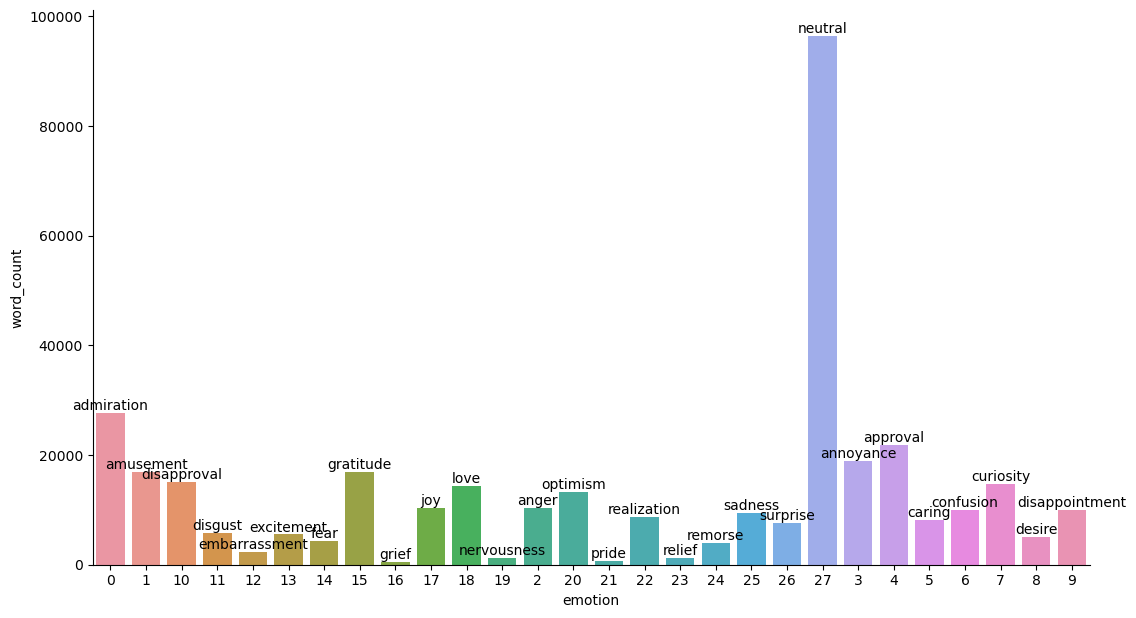

In [10]:
g=sns.catplot(y='word_count', x='emotion', data=emotion_words, kind='bar')
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = text_df['text']
    ax.bar_label(c, labels=labels, label_type='edge')

###  Debido a que text_classification_test.csv no cuenta con etiquetas, se entrenarán los modelos y obtendrán las métricas de errores de text_classification_train.csv, para luego ver el mejor modelo y predecir los datos de text_classification_test.csv

In [11]:
Y=count_text['emotion']
x=count_text['word_count']
X_train,X_test,y_train,y_test= train_test_split(x,Y, test_size=0.2, random_state=np.random)
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

#### Modelo Naive Bayes

In [12]:
nb= BernoulliNB(force_alpha=True)
nb.fit(X_train, y_train)
y_preds_nb = nb.predict(X_test)
f"La accuracy para nb es: {accuracy_score(y_test,y_preds_nb):.4}"

'La accuracy para nb es: 0.2802'

In [13]:
f"F1 score para nb es: {f1_score(y_test,y_preds_nb , average='weighted'):.4}"

'F1 score para nb es: 0.1227'

In [14]:
f"Recall para nb es: {recall_score(y_test,y_preds_nb, average='micro'):.4}"

'Recall para nb es: 0.2802'

In [15]:
f"Precision para nb es: {precision_score(y_test,y_preds_nb , average= 'micro'):.4}"

'Precision para nb es: 0.2802'

#### KNN

In [16]:
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(X_train, y_train)
y_preds_neigh = neigh.predict(X_test)
f"La accuracy para KNN es: {accuracy_score(y_test,y_preds_neigh):.4}"

'La accuracy para KNN es: 0.28'

In [17]:
f"F1 score para KNN es: {f1_score(y_test,y_preds_neigh , average='weighted'):.4}"

'F1 score para KNN es: 0.1226'

In [18]:
f"Recall para KNN es: {recall_score(y_test,y_preds_neigh, average= 'micro'):.4}"

'Recall para KNN es: 0.28'

In [19]:
f"Precision para KNN es: {precision_score(y_test,y_preds_neigh, average= 'micro' ):.4}"

'Precision para KNN es: 0.28'

#### SVM

In [20]:
model2=LinearSVC(max_iter=5, penalty='l2', random_state=2)
model2.fit(X_train,y_train)
y_preds_svm = model2.predict(X_test)
f"La accuracy para SVM es: {accuracy_score(y_test,y_preds_svm):.4}"

C:\Users\crisf\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


'La accuracy para SVM es: 0.03512'

In [21]:
f"F1 score para SVM es: {f1_score(y_test,y_preds_svm, average='weighted'):.4}"

'F1 score para SVM es: 0.006116'

In [22]:
f"Recall para SVM es: {recall_score(y_test,y_preds_svm, average= 'micro'):.4}"

'Recall para SVM es: 0.03512'

In [23]:
f"Precision para KNN es: {precision_score(y_test,y_preds_neigh , average= 'micro'):.4}"

'Precision para KNN es: 0.28'

#### Logistic Regression

In [24]:
lr = LogisticRegressionCV(cv=5, random_state=0, max_iter=10000, solver='lbfgs', class_weight='balanced')
lr.fit(X_train,y_train)
y_preds_lr = lr.predict(X_test)
f"La accuracy para Logistir Regression es: {accuracy_score(y_test,y_preds_lr):.4}"

'La accuracy para Logistir Regression es: 0.05127'

In [25]:
f"F1 score para Logistir Regression es: {f1_score(y_test,y_preds_lr, average='weighted'):.4}"

'F1 score para Logistir Regression es: 0.01056'

In [26]:
f"Recall para Logistir Regression es: {recall_score(y_test,y_preds_lr, average= 'micro'):.4}"

'Recall para Logistir Regression es: 0.05127'

In [27]:
f"Precision para KNN es: {precision_score(y_test,y_preds_neigh, average= 'micro' ):.4}"

'Precision para KNN es: 0.28'

### Método 2: Using Count Vectorizer Model for Featurization of Text

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
Y=count_text['emotion']
x=count_text['text']
X_train,X_test,y_train,y_test= train_test_split(x,Y, test_size=0.2, random_state=3)
X_train=X_train.apply(lambda x: ' '.join(x))
X_test=X_test.apply(lambda x: ' '.join(x))
vect  = CountVectorizer(lowercase= True,stop_words='english', analyzer='word', token_pattern= 'str', tokenizer=tokenization)
X_vec = vect.fit_transform(X_train)
X_test_vec = vect.transform(X_test)

C:\Users\crisf\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### Naive Bayes

In [29]:
nb= BernoulliNB(force_alpha=True)
nb.fit(X_vec, y_train)
y_preds_nb = nb.predict(X_test_vec)
f"La accuracy para nb es: {accuracy_score(y_test,y_preds_nb):.4}"

'La accuracy para nb es: 0.3134'

In [30]:
f"F1 score para nb es: {f1_score(y_test,y_preds_nb , average='weighted'):.4}"

'F1 score para nb es: 0.179'

In [31]:
f"Recall para nb es: {recall_score(y_test,y_preds_nb, average= 'micro' ):.4}"

'Recall para nb es: 0.3134'

In [32]:
f"Precision para nb es: {precision_score(y_test,y_preds_nb, average= 'micro' ):.4}"

'Precision para nb es: 0.3134'

#### KNN

In [33]:
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(X_vec, y_train)
y_preds_neigh = neigh.predict(X_test_vec)
f"La accuracy para KNN es: {accuracy_score(y_test,y_preds_neigh):.4}"

'La accuracy para KNN es: 0.3838'

In [34]:
f"F1 score para SVM es: {f1_score(y_test,y_preds_neigh , average='weighted'):.4}"

'F1 score para SVM es: 0.2772'

In [35]:
f"Recall para KNN es: {recall_score(y_test,y_preds_neigh, average= 'micro' ):.4}"

'Recall para KNN es: 0.3838'

In [36]:
f"Precision para KNN es: {precision_score(y_test,y_preds_neigh , average= 'micro'):.4}"

'Precision para KNN es: 0.3838'

#### SVM

In [37]:
model2=LinearSVC(max_iter=5, penalty='l2', random_state=2)
model2.fit(X_vec,y_train)
y_preds_svm = model2.predict(X_test_vec)
f"La accuracy para SVM es: {accuracy_score(y_test,y_preds_neigh ):.4}"

C:\Users\crisf\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


'La accuracy para SVM es: 0.3838'

In [38]:
f"F1 score para SVM es: {f1_score(y_test,y_preds_svm, average='weighted'):.4}"

'F1 score para SVM es: 0.338'

In [39]:
f"Recall para SVM es: {recall_score(y_test,y_preds_svm, average= 'micro'):.4}"

'Recall para SVM es: 0.3427'

In [40]:
f"Precision para KNN es: {precision_score(y_test,y_preds_neigh, average= 'micro' ):.4}"

'Precision para KNN es: 0.3838'

#### Logistic Regression

In [41]:
lr = LogisticRegressionCV(cv=5, random_state=0, max_iter=10000, solver='lbfgs', class_weight='balanced')
lr.fit(X_vec,y_train)
y_preds_lr = lr.predict(X_test_vec)
f"La accuracy para Logistir Regression es: {accuracy_score(y_test,y_preds_lr):.4}"

'La accuracy para Logistir Regression es: 0.3797'

In [42]:
f"F1 score para Logistir Regression es: {f1_score(y_test,y_preds_lr, average='weighted'):.4}"

'F1 score para Logistir Regression es: 0.3827'

In [43]:
f"Recall para Logistir Regression es: {recall_score(y_test,y_preds_lr, average= 'micro'):.4}"

'Recall para Logistir Regression es: 0.3797'

In [44]:
f"Precision para KNN es: {precision_score(y_test,y_preds_neigh, average= 'micro' ):.4}"

'Precision para KNN es: 0.3838'

### Método 3: Using TF IDF Vectorizer for Featurization of Text

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect_tf = TfidfVectorizer(ngram_range=(1,1),stop_words='english',max_features=3500)
Y=count_text['emotion']
x=count_text['text']
X_train,X_test,y_train,y_test= train_test_split(x,Y, test_size=0.2, random_state=3)
X_train=X_train.apply(lambda x: ' '.join(x))
X_test=X_test.apply(lambda x: ' '.join(x))
X_vec_tf = vect_tf.fit_transform(X_train)
X_test_vec_tf = vect_tf.transform(X_test)
X_train=X_vec_tf
X_test=X_test_vec_tf


#### Naive Bayes

In [46]:
nb= BernoulliNB(force_alpha=True)
nb.fit(X_train, y_train)
y_preds_nb = nb.predict(X_test)
f"La accuracy para nb es: {accuracy_score(y_test,y_preds_nb):.4}"

'La accuracy para nb es: 0.4061'

In [47]:
f"F1 score para nb es: {f1_score(y_test,y_preds_nb , average='weighted'):.4}"

'F1 score para nb es: 0.3393'

In [48]:
f"Recall para nb es: {recall_score(y_test,y_preds_nb , average= 'micro'):.4}"

'Recall para nb es: 0.4061'

In [49]:
f"Precision para nb es: {precision_score(y_test,y_preds_nb, average= 'micro' ):.4}"

'Precision para nb es: 0.4061'

### Debido a que Naive Bayes junto al método 3 obtuvieron las mejores métricas, se obtendrá la matriz de confusión

<Axes: >

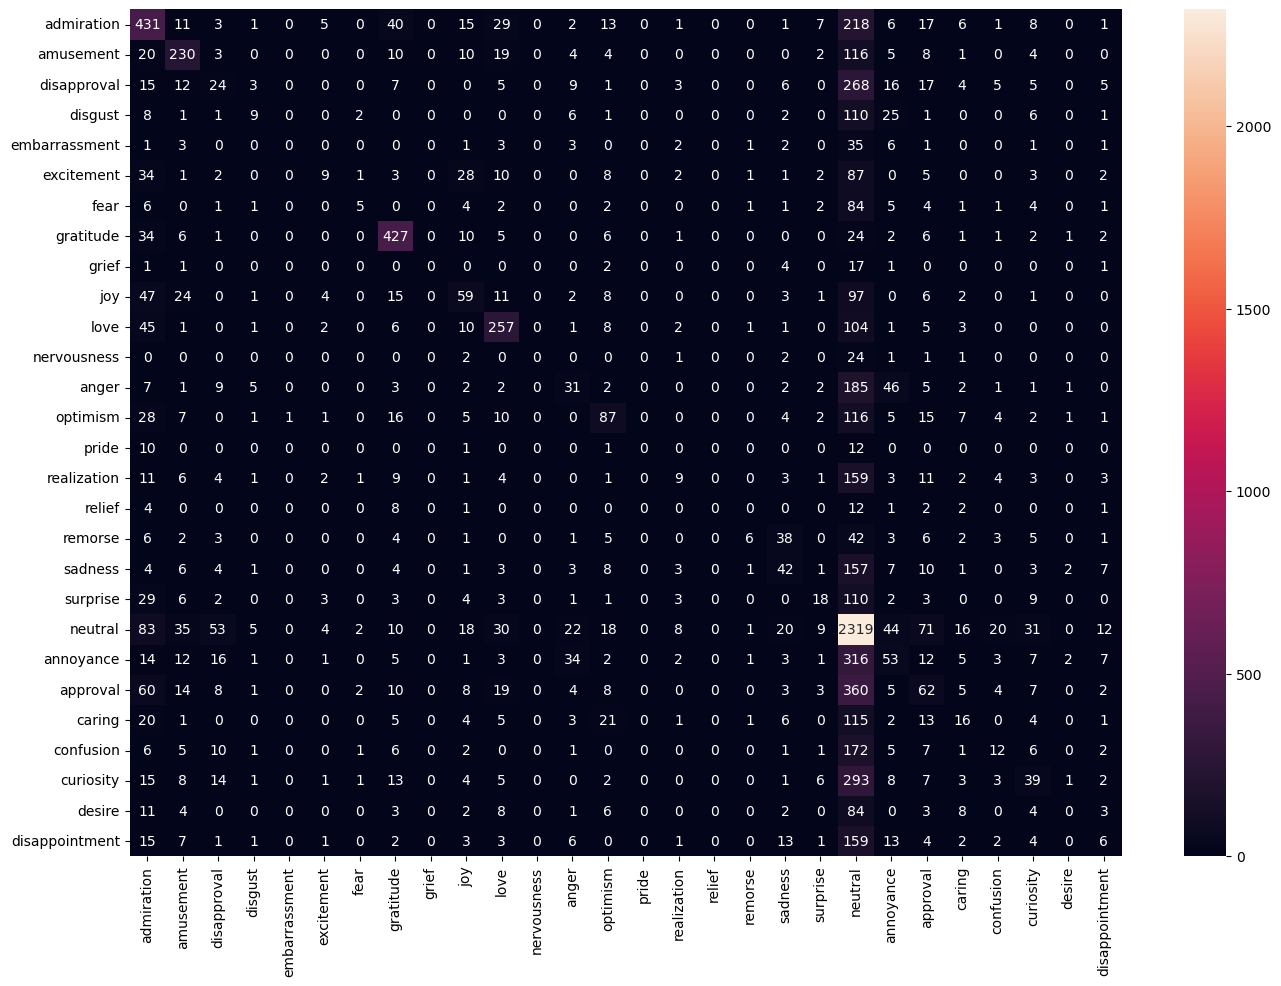

In [50]:
cf_matrix_xgb = sklearn.metrics.confusion_matrix(y_test,y_preds_nb)
array = cf_matrix_xgb
df_cm = pd.DataFrame(array, index = [i for i in pd.Series(nb.classes_).str.strip().astype(int).map(label_to_text)], 
                     columns =[i for i in pd.Series(nb.classes_).str.strip().astype(int).map(label_to_text)])
plt.figure(figsize = (16,11))
sns.heatmap(df_cm, annot=True, fmt='g')


#### KNN

In [51]:
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(X_train, y_train)
y_preds_neigh = neigh.predict(X_test)
f"La accuracy para KNN es: {accuracy_score(y_test,y_preds_neigh):.4}"

'La accuracy para KNN es: 0.3264'

In [52]:
f"F1 score para KNN es: {f1_score(y_test,y_preds_neigh , average='weighted'):.4}"

'F1 score para KNN es: 0.2191'

In [53]:
f"Recall para KNN es: {recall_score(y_test,y_preds_neigh, average= 'micro' ):.4}"

'Recall para KNN es: 0.3264'

In [54]:
f"Precision para KNN es: {precision_score(y_test,y_preds_neigh, average= 'micro' ):.4}"

'Precision para KNN es: 0.3264'

#### SVM

In [55]:
model2=LinearSVC(max_iter=5, penalty='l2', random_state=2)
model2.fit(X_train,y_train)
y_preds_svm = model2.predict(X_test)
f"La accuracy para SVM es: {accuracy_score(y_test,y_preds_svm):.4}"

C:\Users\crisf\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


'La accuracy para SVM es: 0.3967'

In [56]:
f"F1 score para SVM es: {f1_score(y_test,y_preds_svm, average='weighted'):.4}"

'F1 score para SVM es: 0.3842'

In [57]:
f"Recall para SVM es: {recall_score(y_test,y_preds_svm, average= 'micro'):.4}"

'Recall para SVM es: 0.3967'

In [58]:
f"Precision para SVM es: {precision_score(y_test,y_preds_svm, average= 'micro'):.4}"


'Precision para SVM es: 0.3967'

#### Logistic Regression

In [59]:
lr = LogisticRegressionCV(cv=5, random_state=0, max_iter=10000, solver='lbfgs', class_weight='balanced')
lr.fit(X_train,y_train)
y_preds_lr = lr.predict(X_test)
f"La accuracy para Logistir Regression es: {accuracy_score(y_test,y_preds_lr):.4}"

'La accuracy para Logistir Regression es: 0.3563'

In [60]:
f"F1 score para Logistir Regression es: {f1_score(y_test,y_preds_lr, average='weighted'):.4}"

'F1 score para Logistir Regression es: 0.3573'

In [61]:
f"Recall para Logistir Regression es: {recall_score(y_test,y_preds_lr, average= 'micro'):.4}"

'Recall para Logistir Regression es: 0.3563'

In [62]:
f"Precision para Logistir Regression es: {precision_score(y_test,y_preds_lr, average= 'micro'):.4}"

'Precision para Logistir Regression es: 0.3563'

## Predicción de text_classification_test.csv

In [63]:
test_1=test['text']
test_1=test_1.apply(lambda x: ' '.join(x))
test_1 = vect_tf.transform(test_1)

In [64]:
pred=nb.predict(test_1)
pred_df=pd.DataFrame(pred, columns=['emotion'])
emotion_pred_number=pred_df.value_counts().reset_index()
emotion_pred_number.columns=['emotion', 'count']

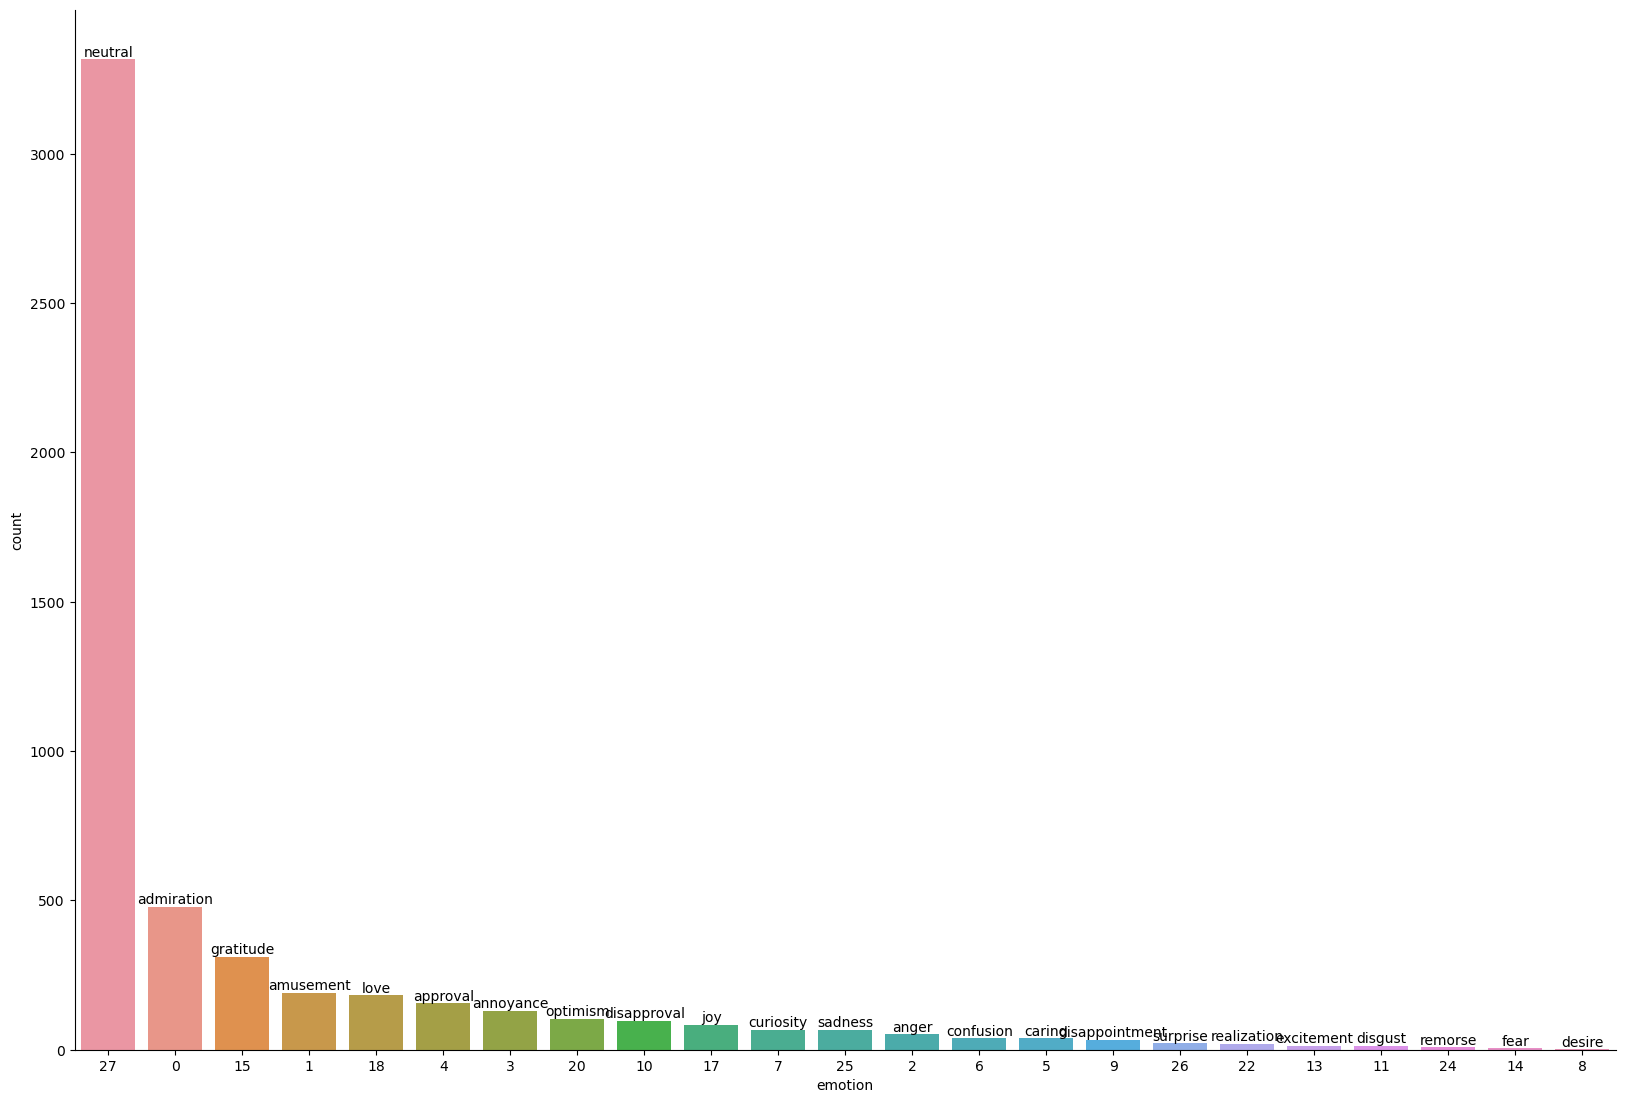

In [65]:
g=sns.catplot(y='count', x='emotion',data=emotion_pred_number, kind='bar')
g.fig.set_size_inches(22, 15)
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = emotion_pred_number['emotion'].str.strip().astype(int).map(label_to_text)
    ax.bar_label(c, labels=labels, label_type='edge')

### Preguntas: 

1. ¿De qué manera se puede complementar la solución? Pensar en propuestas para el cliente.
2. ¿Cómo se podría simplificar la tarea?
3. ¿Cuáles pueden ser las limitaciones, riesgos, sesgos de los modelos al implementar este tipo de soluciones?
4. ¿Qué otras cosas hay que considerar al momento de implementar un proyecto como este?

### Respuestas  

1. Propuesta para el cliente: Se utilizaron todos los tipos de pre-procesamiento de texto y los métodos que más se utilizan en procesamiento de estos. Como complemento a esto, existen librerías que contienen textos con emociones o datasets en kaggle o páginas similares de machine learning, los cuales se pueden utilizar para tener más datos con los cuales los modelos puedan generalizar y obtener mejores métricas.

2. La tarea se simplifica reduciendo el número de etiquetas y otorgándole solo 1 etiqueta (emoción) a cada texto. En contexto de modelos de machine learning, estos tienen como objetivo 'aprender' de los datos y con eso lograr una generalización para luego predecir sobre nuevos datos. Si hay un texto con más de una etiqueta, la generalización no se logra debido a que no se tendrá una correlación entre las palabras y la emoción. Además, existen emociones similares como por ejemplo 'optimism', 'joy' ,'love' ,'admiration' , 'approval', por decir algunas, que puede que tengan palabras similares, generando que la generalización sea difícil de lograr. Por eso es mejor reducir el número de etiquetas para que el modelo de machine learning cree correlaciones entre el texto y la emoción. Otra observación dificulta que los modelos aprendan es que se tiene una emoción ambigua: 'neutral', la cual capta muchas palabras y cabe la duda ¿neutral es el texto sin alguna emoción? Lo cual es paradójico, porque la respuesta 'sí' a esa pregunta, hace que se elimine esa etiqueta y se vuelvan a etiquetar los textos nuevamente y la respuesta 'no' genera lo mismo: que se elija una emoción dentro de las demás, provocando que se vuelvan a etiquetar los datos. 

   Siguiendo con la respuesta a la pregunta, el hecho de tener tantas emociones y pocos datos para la mayoría de estos, genera que la tarea se dificulte, es decir, se simplicaría la tarea si hubieran mas datos por emociones. Se podrían utilizar algunas técnicas para solucionar el imbalance classes, pero solo servirían para las clases con más datos, debido a que las que tienen menos datos solo repetirían los datos que ya se tienen hasta balancearlo, lo cual no aporta a la generalización de los modelos.

3. El riesgo que se corre es el sobreajuste, debido a que es posible que se adapten los modelos muy bien a los datos de entrenamiento y al entrar texto nuevo, el error para predecir la emoción sea muy elevado (sólo ocurre si hay pocos datos). Al igual que en el procesamiento de imágenes, se necesitan del orden de los cientos de miles o millones de datos para que el modelo pueda lograr una generalización con errores pequeños.

4. Las cosas que hay que considerar que cada texto solo posea 1 etiqueta para que la correlación sea alta, que haya suficiente cantidad de datos como para lograr una generalización y que la cantidad de etiquetas sea menor; existen 28 emociones y hay algunas que se parecen entre ellas, esto quiere decir, que las palabras utilizadas puede que sean similares, afectando en el aprendizaje de los modelos

### Se añaden las etiquetas de emociones al archivo text_classification_test.csv

In [66]:
test_copy=pd.read_csv('text_classification_test.csv')
test_copy['emotion']=pred_df
test_copy.to_csv('text_classification_test.csv', sep=';')